In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

# Logistic Regression From Scratch

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.15)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights)
            y_pred = sigmoid(z)
            gradient = np.dot(X.T, (y_pred - y)) / y.size
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.weights)
        y_pred = sigmoid(z)
        return np.round(y_pred)

**Sigmoid Function :** $$\sigma(z) = \frac{1}{1 + e^{-z}}$$


**Prediction :**
$$
\hat{y} = \text{round}(\text{sigmoid}(\mathbf{X}\cdot\mathbf{w}))
$$

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

model = LogisticRegression(learning_rate=0.001, num_iterations=100)
model.fit(X_tr_scaled, y_tr)

y_pred = model.predict(X_te_scaled)

accuracy = accuracy_score(y_te, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_te, y_pred)

print(f"F1 Score: {f1}")

F1 Score: 0.7272727272727273


In [ ]:
from sklearn.linear_model import LogisticRegression as skLogisticRegression
model_sk = skLogisticRegression()
model_sk.fit(X_tr_scaled, y_tr)
y_pred_sk = model_sk.predict(X_te_scaled)
f1_sk = f1_score(y_te, y_pred_sk)
print(f"F1 Score: {f1_sk}")

F1 Score: 1.0


In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

logistic_classifier = skLogisticRegression()
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)

accuracy = accuracy_score(y_test, logistic_predictions)

print("Logistic Regression Accuracy :", accuracy)

Logistic Regression Accuracy : 1.0


| Library/Metric      | F1 Score | Accuracy |
|:-------------------|---------:|---------:|
| With SK-Learn       |       1.0|       1.0|
| Without SK-Learn    |     0.727|       0.8|


# Using Standard Library

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model=LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
print(f1_score(y_te,y_pred))

1.0


In [ ]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
lr = LogisticRegression(random_state=0,multi_class='auto')
lr.fit(X_train_std,y_train)
y_pred=lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
weights,params=[],[]
for c in np.arange(0,5):
  lr=LogisticRegression(C=10**c,random_state=0)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

In [ ]:
weights=np.array(weights)
print(weights)

[[ 0.10346765 -0.34695016]
 [-0.3911241  -0.55381597]
 [-0.72478921 -0.43688454]
 [-0.17298257  0.11457287]
 [ 0.58842969  0.77548503]]


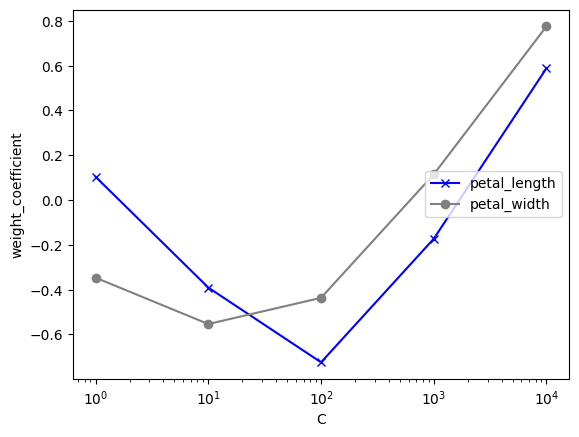

In [ ]:
plt.plot(params,weights[:,0],color='blue',marker='x',label='petal_length')
plt.plot(params,weights[:,1],color='gray',marker='o',label='petal_width')
plt.ylabel('weight_coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

# Multimodal Calssification

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
  markers=('s','x','o','^','v')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  X_test,y_test=X[test_idx,:],y[test_idx]
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
    if test_idx:
      X_test,y_test=X[test_idx,:],y[test_idx]
      plt.scatter(X_test[:,0],X_test[:,1],c='Yellow',alpha=1.0,linewidth=1,marker='o',s=55,label='test set')

<ipython-input-21-6287289459f0>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)


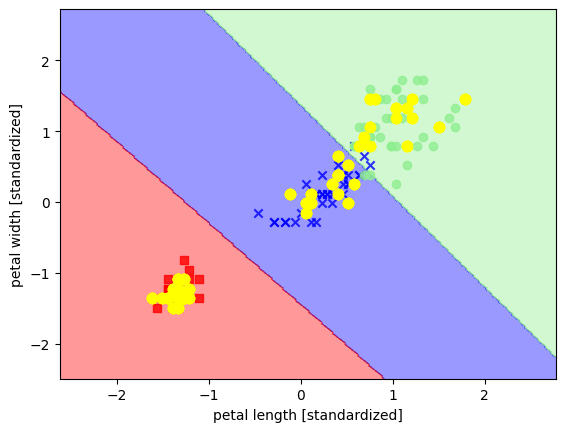

In [ ]:
import numpy as np
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

## Evaluating Logistic Regression without Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model_no_reg = LogisticRegression(C=1e6)
model_no_reg.fit(X_tr, y_tr)
y_pred_no_reg = model_no_reg.predict(X_te)
print("Logistic Regression without Regularization: ")
print(classification_report(y_te,y_pred_no_reg))

Logistic Regression without Regularization: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
model_reg = LogisticRegression(C=1.0)
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)
print("Logistic regression with Regularization: ")
print(classification_report(y_test, y_pred_reg))

Logistic regression with Regularization: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

